In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
Female = pd.read_csv(r"C:\Users\hp\repositories\Corizo\Corinzo\Data Science\Jupyter\Project\Minor\nhanes_adult_female_bmx_2020.csv",sep=",",comment="#")
Female


,BMXWT,BMXHT,BMXARML,BMXLEG,BMXARMC,BMXHIP,BMXWAIST
0,97.1,160.2,34.7,40.8,35.8,126.1,117.9
1,91.1,152.7,33.5,33.0,38.5,125.5,103.1
2,73.0,161.2,37.4,38.0,31.8,106.2,92.0
3,61.7,157.4,38.0,34.7,29.0,101.0,90.5
4,55.4,154.6,34.6,34.0,28.3,92.5,73.2
...,...,...,...,...,...,...,...
4216,66.8,157.0,32.6,38.4,30.7,103.8,92.5
4217,116.9,167.4,42.2,43.0,40.7,128.4,120.0
4218,73.0,159.6,36.2,37.0,31.4,104.6,99.3
4219,78.6,168.5,38.1,40.2,36.0,102.4,98.5


In [4]:
Male = pd.read_csv(
    r"C:\Users\hp\repositories\Corizo\Corinzo\Data Science\Jupyter\Project\Minor\nhanes_adult_male_bmx_2020.csv",
    sep=",",
    comment="#",
)
Male


,BMXWT,BMXHT,BMXARML,BMXLEG,BMXARMC,BMXHIP,BMXWAIST
0,98.8,182.3,42.0,40.1,38.2,108.2,120.4
1,74.3,184.2,41.1,41.0,30.2,94.5,86.8
2,103.7,185.3,47.0,44.0,32.0,107.8,109.6
3,86.0,167.8,39.5,38.4,29.0,106.4,108.3
4,99.4,181.6,40.4,39.9,36.0,120.2,107.0
...,...,...,...,...,...,...,...
4076,114.3,174.5,42.0,35.5,37.0,117.4,119.5
4077,94.3,178.8,37.8,44.6,35.7,105.3,99.3
4078,108.8,168.7,38.6,45.6,33.6,118.0,114.7
4079,79.5,176.4,39.5,42.0,31.4,99.8,97.1


In [5]:
female_weights =Female.iloc[:, 0]
female_weights


0        97.1
1        91.1
2        73.0
3        61.7
4        55.4
        ...  
4216     66.8
4217    116.9
4218     73.0
4219     78.6
4220     82.8
Name: BMXWT, Length: 4221, dtype: float64

In [6]:
male_weights = Male.iloc[:, 0]
male_weights


0        98.8
1        74.3
2       103.7
3        86.0
4        99.4
        ...  
4076    114.3
4077     94.3
4078    108.8
4079     79.5
4080     59.7
Name: BMXWT, Length: 4081, dtype: float64

In [ ]:
x_min = min(female_weights.min(), male_weights.min())
x_max = max(female_weights.max(), male_weights.max())
x_limits = (30, 150)
x_min, x_max

(np.float64(32.6), np.float64(204.6))

In [8]:
plt.figure(figsize=(10, 6))


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

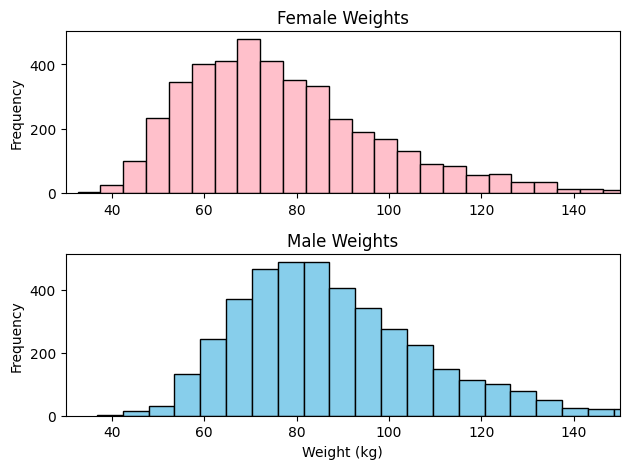

In [9]:
plt.subplot(2, 1, 1)
plt.hist(female_weights, bins=30, color="pink", edgecolor="black")
plt.title("Female Weights")
plt.xlim(x_limits)
plt.ylabel("Frequency")

plt.subplot(2, 1, 2)
plt.hist(male_weights, bins=30, color="skyblue", edgecolor="black")
plt.title("Male Weights")
plt.xlim(x_limits)
plt.xlabel("Weight (kg)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_4108\940721046.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([female_weights, male_weights], labels=["Female", "Male"])


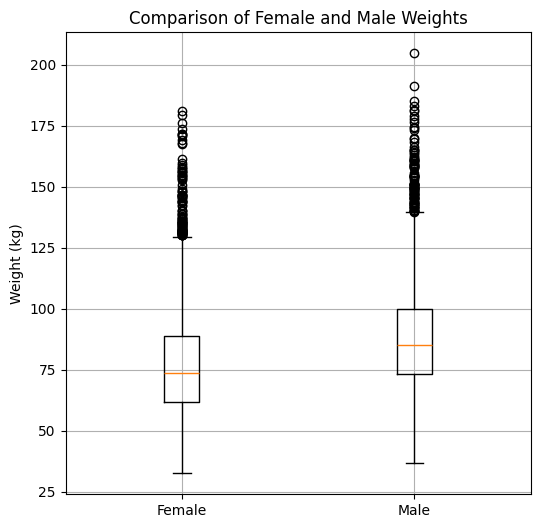

In [10]:
plt.figure(figsize=(6, 6))
plt.boxplot([female_weights, male_weights], labels=["Female", "Male"])
plt.title("Comparison of Female and Male Weights")
plt.ylabel("Weight (kg)")
plt.grid(True)
plt.show()


Male weights are generally higher than female weights — the male box is higher up.

Male distribution might have greater spread (variability) if the box and whiskers are longer.

If female weights have a shorter box and whiskers, it means they are more consistent (less spread out).

Outliers on either side show individuals who are unusually light or heavy.

In [11]:
# Get summary stats
female_stats = female_weights.describe()
male_stats = male_weights.describe()

# Print table header
print("Stat\t\tFemale\t\tMale"
      )

# Loop through each stat
for stat in female_stats.index:
    print(f"{stat:<8}\t{female_stats[stat]:.2f}\t\t{male_stats[stat]:.2f}")


Stat		Female		Male
count   	4221.00		4081.00
mean    	77.40		88.36
std     	21.55		21.42
min     	32.60		36.80
25%     	61.60		73.30
50%     	73.60		85.00
75%     	88.70		99.80
max     	180.90		204.60


#Location (Mean & Median):

1.Male weights are generally higher than female weights.

2.Median and mean are close, so both distributions are fairly symmetric.

#Dispersion (Standard Deviation):

1.Male weights have more spread (15 kg vs 12 kg), so their weights vary more.

#Shape (Skewness):

1.A positive skew (e.g., 0.6) means a longer tail on the right, so a few individuals are much heavier than the average.

2.Both distributions are slightly right-skewed, but males have a more noticeable skew.

In [12]:
# Convert DataFrame to NumPy matrix
female = Female.to_numpy()

# Calculate BMI (weight / height²)
# female[:, 0] = weight (kg), female[:, 1] = height (cm)
bmi = female[:, 0] / ((female[:, 1] / 100) ** 2)

# Add BMI as the 8th column
female = np.column_stack((female, bmi))


In [13]:
female

array([[ 97.1       , 160.2       ,  34.7       , ..., 126.1       ,
        117.9       ,  37.83504078],
       [ 91.1       , 152.7       ,  33.5       , ..., 125.5       ,
        103.1       ,  39.06972037],
       [ 73.        , 161.2       ,  37.4       , ..., 106.2       ,
         92.        ,  28.09265496],
       ...,
       [ 73.        , 159.6       ,  36.2       , ..., 104.6       ,
         99.3       ,  28.65873958],
       [ 78.6       , 168.5       ,  38.1       , ..., 102.4       ,
         98.5       ,  27.68361084],
       [ 82.8       , 147.8       ,  34.8       , ..., 121.4       ,
        110.        ,  37.90368801]], shape=(4221, 8))

In [14]:
zfemale = (female - np.mean(female, axis=0)) / np.std(female, axis=0)


In [15]:
selected = zfemale[:, [1, 0, 6, 5, 7]]
cols = ["Height", "Weight", "Waist", "Hip", "BMI"]
df = pd.DataFrame(selected, columns=cols)


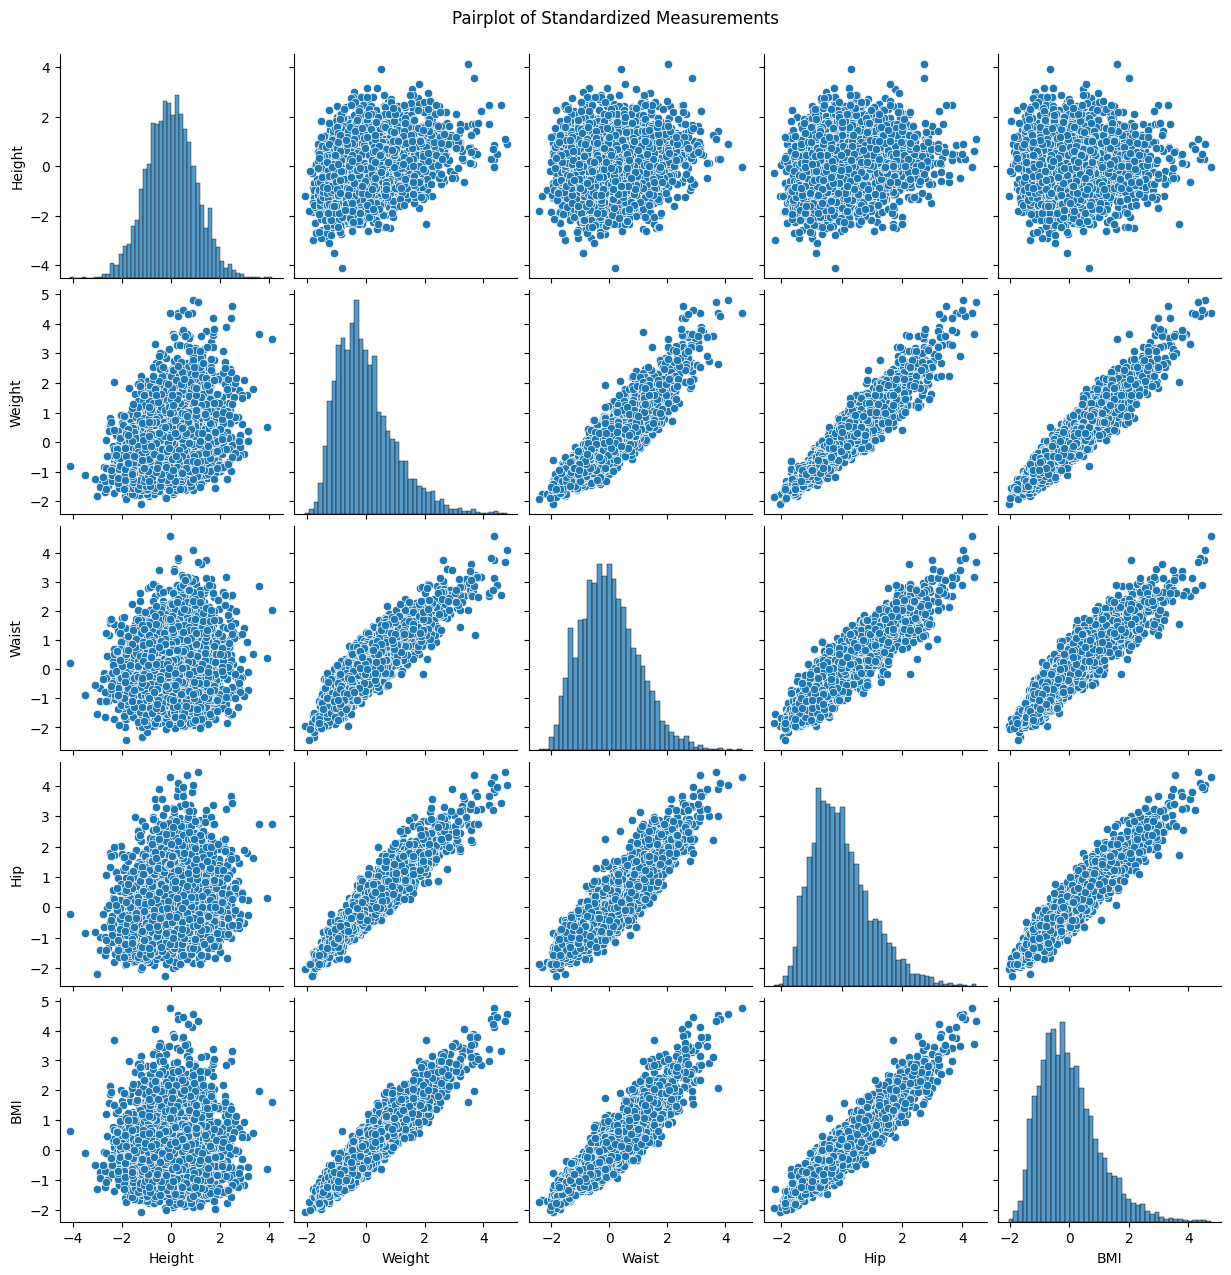

In [16]:
sns.pairplot(df)
plt.suptitle("Pairplot of Standardized Measurements", y=1.02)
plt.show()


In [17]:
print("Pearson's correlation coefficients:")
print(df.corr(method="pearson"))


Pearson's correlation coefficients:
          Height    Weight     Waist       Hip       BMI
Height  1.000000  0.345496  0.126547  0.202895  0.033077
Weight  0.345496  1.000000  0.904550  0.946553  0.945900
Waist   0.126547  0.904550  1.000000  0.897407  0.921198
Hip     0.202895  0.946553  0.897407  1.000000  0.944199
BMI     0.033077  0.945900  0.921198  0.944199  1.000000


In [18]:
# Compute and print Spearman's correlation
print("\nSpearman's correlation coefficients:")
print(df.corr(method="spearman"))



Spearman's correlation coefficients:
          Height    Weight     Waist       Hip       BMI
Height  1.000000  0.338860  0.108587  0.205405  0.019897
Weight  0.338860  1.000000  0.900169  0.946634  0.937999
Waist   0.108587  0.900169  1.000000  0.888037  0.923114
Hip     0.205405  0.946634  0.888037  1.000000  0.934196
BMI     0.019897  0.937999  0.923114  0.934196  1.000000


In [19]:
# Female ratios
waist_to_height_f = female[:, 6] / female[:, 1]
waist_to_hip_f = female[:, 6] / female[:, 5]
female = np.column_stack((female, waist_to_height_f, waist_to_hip_f))
female



array([[ 97.1       , 160.2       ,  34.7       , ...,  37.83504078,
          0.73595506,   0.93497224],
       [ 91.1       , 152.7       ,  33.5       , ...,  39.06972037,
          0.67518009,   0.82151394],
       [ 73.        , 161.2       ,  37.4       , ...,  28.09265496,
          0.5707196 ,   0.86629002],
       ...,
       [ 73.        , 159.6       ,  36.2       , ...,  28.65873958,
          0.62218045,   0.94933078],
       [ 78.6       , 168.5       ,  38.1       , ...,  27.68361084,
          0.58456973,   0.96191406],
       [ 82.8       , 147.8       ,  34.8       , ...,  37.90368801,
          0.74424899,   0.90609555]], shape=(4221, 10))

In [20]:
# Waist = column 6, Height = column 1, Hip = column 5
waist_to_height_f = Female.iloc[:, 6] / Female.iloc[:, 1]
waist_to_hip_f = Female.iloc[:, 6] / Female.iloc[:, 5]
Female["Waist_Height"] = waist_to_height_f
Female["Waist_Hip"] = waist_to_hip_f

waist_to_height_m = Male.iloc[:, 6] / Male.iloc[:, 1]
waist_to_hip_m = Male.iloc[:, 6] / Male.iloc[:, 5]
Male["Waist_Height"] = waist_to_height_m
Male["Waist_Hip"] = waist_to_hip_m


C:\Users\hp\AppData\Local\Temp\ipykernel_4108\600653589.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


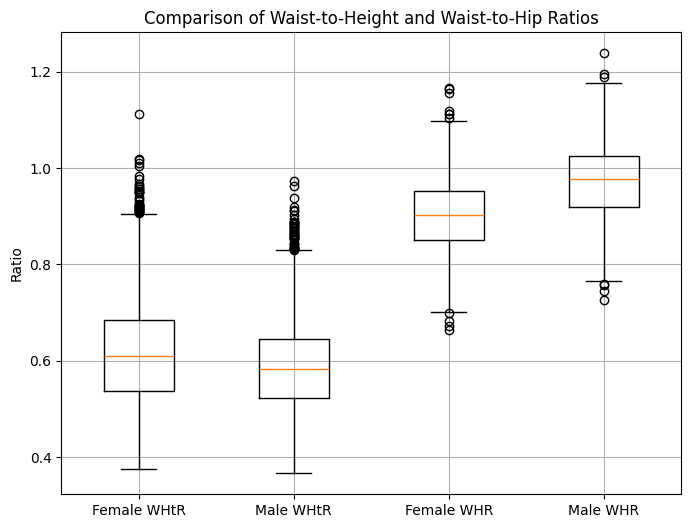

In [21]:
# Prepare data for plotting
data = [
    Female["Waist_Height"],
    Male["Waist_Height"],
    Female["Waist_Hip"],
    Male["Waist_Hip"],
]

# Labels for each box
labels = ["Female WHtR", "Male WHtR", "Female WHR", "Male WHR"]

# Create boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(data, labels=labels)
plt.title("Comparison of Waist-to-Height and Waist-to-Hip Ratios")
plt.ylabel("Ratio")
plt.grid(True)
plt.show()


WHtR (Waist-to-Height Ratio): Tells how much of your height is waist.

WHR (Waist-to-Hip Ratio): Shows body fat distribution.

If males have higher WHR than females, they may store more fat around the abdomen.

If females have lower WHtR, it could mean proportionally narrower waists.

Wider boxes mean more variation in the group.

Dots outside are outliers — people far from the average body shape.

#BMI (Body Mass Index)

    What it is:

            It compares your weight to your height.

    Advantages:

            Very easy to calculate

            Commonly used by doctors

            Good for checking if someone is underweight or overweight

    Disadvantages:

            Does not show where fat is on the body

            Cannot tell the difference between fat and muscle

            May say a strong person is overweight, even if they are healthy

#Waist-to-Height Ratio (WHtR)

    What it is:

        It compares your waist size to your height.

    Advantages:

        Helps show how much fat is around your belly

        Better at showing health risk than BMI

        Same formula works for both men and women

    Disadvantages:

        Needs correct waist measurement

        Not used by everyone yet

Waist-to-Hip Ratio (WHR)

    What it is:
    
        It compares your waist size to your hip size.

    Advantages:

        Shows how fat is spread on the body

        Helps check risk of heart problems

    Disadvantages:

        Can be hard to measure hips correctly

        Can give wrong results if body shape is unusual

In [22]:
# Assume zfemale is a NumPy array and BMI is in column index 0 (adjust if needed)
bmi_column = 0

# Get the indices of sorted BMI values
sorted_indices = np.argsort(zfemale[:, bmi_column])

# Select 5 lowest BMI and 5 highest BMI
lowest_indices = sorted_indices[:5]
highest_indices = sorted_indices[-5:]

# Combine both sets of indices
selected_indices = np.concatenate((lowest_indices, highest_indices))

# Print the standardized body measurements for these 10 persons
print("Standardized measurements for 5 persons with lowest and highest BMI:")
print(zfemale[selected_indices])


Standardized measurements for 5 persons with lowest and highest BMI:
[[-2.07978523 -1.22299143 -1.5478402  -1.16905675 -2.1947611  -2.0405496
  -1.94212128 -2.05024028]
 [-1.91267377 -1.81772196 -1.71835247 -0.08025178 -1.89167466 -1.88052341
  -2.41920058 -1.7303623 ]
 [-1.88017988 -0.18929313 -1.71835247  0.38637892 -2.4443617  -1.85491922
  -2.05708015 -1.99487987]
 [-1.843044   -0.26009438 -0.22637009  0.51081377 -2.30173278 -2.25178417
  -1.85590213 -1.94177591]
 [-1.81983407 -1.86020272 -2.27251735 -1.07573061 -2.03430357 -1.9061276
  -1.99960071 -1.6022275 ]
 [ 4.36328993  0.84440517  2.11817365  0.01307436  3.56388124  3.7972057
   3.12756482  4.12915837]
 [ 4.45612963  0.50455915  1.69189297 -1.13794804  3.34993787  3.98283607
   2.90339503  4.46201122]
 [ 4.58610521  2.472834    2.54445433  2.84396727  3.36776648  3.45795018
   2.55851842  3.32153196]
 [ 4.72536476  1.11344994  2.24605786 -1.13794804  4.20571134  4.46931568
   3.6678715   4.30534087]
 [ 4.8042785   0.88688592

In [23]:
# BMI is the last column in your 'zfemale' (index -1 or 7 if you count directly)
bmi_index = -1  # or 7

# Sort indices by BMI
sorted_indices = np.argsort(zfemale[:, bmi_index])

# Get indices of 5 lowest and 5 highest BMI
lowest_indices = sorted_indices[:5]
highest_indices = sorted_indices[-5:]

# Combine them
selected_indices = np.concatenate((lowest_indices, highest_indices))

# Print selected rows
print("Standardized measurements for 5 persons with lowest and highest BMI:")
print(zfemale[selected_indices])


Standardized measurements for 5 persons with lowest and highest BMI:
[[-2.07978523 -1.22299143 -1.5478402  -1.16905675 -2.1947611  -2.0405496
  -1.94212128 -2.05024028]
 [-1.88017988 -0.18929313 -1.71835247  0.38637892 -2.4443617  -1.85491922
  -2.05708015 -1.99487987]
 [-1.53667299  1.80730222  0.62619127  0.5730312  -2.26607556 -1.6756899
  -1.7064556  -1.97088383]
 [-1.843044   -0.26009438 -0.22637009  0.51081377 -2.30173278 -2.25178417
  -1.85590213 -1.94177591]
 [-1.61094475  0.88688592 -0.09848588  0.47970506 -2.21258971 -1.82931504
  -1.71220354 -1.89319577]
 [ 4.2472403   0.29215539  1.86240524 -0.98240447  2.3693641   4.10445598
   3.81731803  4.39649161]
 [ 4.45612963  0.50455915  1.69189297 -1.13794804  3.34993787  3.98283607
   2.90339503  4.46201122]
 [ 4.34936397  0.27799514  2.84285081  1.94181459  4.36616887  3.9188256
   3.75409065  4.51466896]
 [ 4.8042785   0.88688592  2.11817365  1.81737973  3.77782461  4.02124236
   4.08172343  4.54270932]
 [ 4.36328993 -0.03353037

#Interpretation of Results

    Low BMI group:
        1.These individuals typically have lower weight relative to their height. In the standardized data, you might observe:

        2. Lower-than-average values for weight and waist.

        3. Possibly higher standardized height if they are tall but light.

     High BMI group:
        1. These individuals have higher weight relative to their height. You may see:

        2. Higher-than-average values for weight, waist, and possibly hip circumference.

        3. If height is lower than average, BMI can be high even with moderate weight.

General Insight:
        
        1. BMI does not account for body composition (like muscle vs. fat). So in standardized terms, even if BMI is high, some other values (like waist-to-hip ratio) can give a better picture of health risk.

Inshort We can say that

    1. Low BMI → lower weight and waist, often taller

    2. High BMI → higher weight, waist, thigh, hip, and usually not tall

    3. BMI doesn't show fat distribution, which is why it's good to look at waist, hip, and thigh separately

In [24]:

# Get index positions sorted by BMI (column 7)
bmi_sorted_indices = np.argsort(female[:, 7])

# Get indices for lowest 5 and highest 5
lowest_5 = bmi_sorted_indices[:5]
highest_5 = bmi_sorted_indices[-5:]

# Combine them
selected_indices = np.concatenate((lowest_5, highest_5))

# Print standardized rows from zfemale
print("Standardized body measurements for lowest and highest BMI:")
print(zfemale[selected_indices])


Standardized body measurements for lowest and highest BMI:
[[-2.07978523 -1.22299143 -1.5478402  -1.16905675 -2.1947611  -2.0405496
  -1.94212128 -2.05024028]
 [-1.88017988 -0.18929313 -1.71835247  0.38637892 -2.4443617  -1.85491922
  -2.05708015 -1.99487987]
 [-1.53667299  1.80730222  0.62619127  0.5730312  -2.26607556 -1.6756899
  -1.7064556  -1.97088383]
 [-1.843044   -0.26009438 -0.22637009  0.51081377 -2.30173278 -2.25178417
  -1.85590213 -1.94177591]
 [-1.61094475  0.88688592 -0.09848588  0.47970506 -2.21258971 -1.82931504
  -1.71220354 -1.89319577]
 [ 4.2472403   0.29215539  1.86240524 -0.98240447  2.3693641   4.10445598
   3.81731803  4.39649161]
 [ 4.45612963  0.50455915  1.69189297 -1.13794804  3.34993787  3.98283607
   2.90339503  4.46201122]
 [ 4.34936397  0.27799514  2.84285081  1.94181459  4.36616887  3.9188256
   3.75409065  4.51466896]
 [ 4.8042785   0.88688592  2.11817365  1.81737973  3.77782461  4.02124236
   4.08172343  4.54270932]
 [ 4.36328993 -0.03353037 -0.055857

In [25]:


# Define column names based on your matrix:
columns = [
    "Weight",
    "Height",
    "Arm Length",
    "Leg Length",
    "Arm Circ.",
    "Hip Circ.",
    "Waist Circ.",
    "BMI",
]

# Create a DataFrame from the selected rows in zfemale
selected_data = zfemale[selected_indices]
bmi_extremes_df = pd.DataFrame(selected_data, columns=columns)

# Add a label column: 'Lowest BMI' for first 5, 'Highest BMI' for last 5
labels = ["Lowest BMI"] * 5 + ["Highest BMI"] * 5
bmi_extremes_df["Group"] = labels

# Print the table
print(bmi_extremes_df)


     Weight    Height  Arm Length  Leg Length  Arm Circ.  Hip Circ.  \
0 -2.079785 -1.222991   -1.547840   -1.169057  -2.194761  -2.040550   
1 -1.880180 -0.189293   -1.718352    0.386379  -2.444362  -1.854919   
2 -1.536673  1.807302    0.626191    0.573031  -2.266076  -1.675690   
3 -1.843044 -0.260094   -0.226370    0.510814  -2.301733  -2.251784   
4 -1.610945  0.886886   -0.098486    0.479705  -2.212590  -1.829315   
5  4.247240  0.292155    1.862405   -0.982404   2.369364   4.104456   
6  4.456130  0.504559    1.691893   -1.137948   3.349938   3.982836   
7  4.349364  0.277995    2.842851    1.941815   4.366169   3.918826   
8  4.804279  0.886886    2.118174    1.817380   3.777825   4.021242   
9  4.363290 -0.033530   -0.055858   -0.173578   2.779422   4.315691   

   Waist Circ.       BMI        Group  
0    -1.942121 -2.050240   Lowest BMI  
1    -2.057080 -1.994880   Lowest BMI  
2    -1.706456 -1.970884   Lowest BMI  
3    -1.855902 -1.941776   Lowest BMI  
4    -1.712204 -1.

Observation

Lowest BMI Group (First 5 Rows):

    1. Weight and waist circumference are well below average (values like -2.0 and lower).

    2. Hip circumference and arm circumference are also below average.

    3. Height is around or above average for some (e.g., +1.8), meaning some of these individuals are tall but very slim.

Overall, these participants are thin and tall, with low body fat.

Weight, waist circumference, hip circumference, and BMI are all strongly above average (values like +4.0 and higher).

Some have average or slightly above-average height, but the high waist and weight push their BMI up.

These participants show signs of very high body fat, especially around the waist and hip areas.

Thus From Above Analysis of data we can say that


    1. BMI is strongly influenced by weight and waist circumference.

    2. People with low BMI tend to be tall and light, with slim waists and hips.

    3. People with high BMI are much heavier, often with large waist and hip sizes, even if their height is average

END